# Lecture 3B  KNN Classification Model

In [1]:
# import necessary libraries and specify that graphs should be plotted inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## K-Nearest Neighbor



KNN is realized through:
**<center>sklearn.neighbors.KNeighborsClassifier(n_neighbors)</center>**
- n_neighbors: how many neighbors (k)
- p: the distance measure. p=2 for euclidean distance (default), p=1 for manhattan distance.

After training the model with .fit method, you can use .predict and .score for prediction and performance report. You can also use .kneighbors to find the neighbors and corresponding distances for a (set of) new point(s). 

*Extension:To use KNN for regression purpose, check: sklearn.neighbors.KNeighborsRegressor.*

### IRIS EXAMPLE: 3 classes
IRIS dataset consists of 3 different types of irises (Setosa, Versicolour, and Virginica). <br>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSmB9_4H5JcyEDxrhVHKdS1678wFZnVotXwWKag7PpT&s" /><br>There are 150 observations and 4 features: Sepal Length, Sepal Width, Petal Length and Petal Width. The features are stored in a 150x4 2D numpy array. The target is a 1D numpy array indicating the type of each iris.

**Practice:**
- Load the data and get a general idea of the dataset
- We will use the first two features to predict the iris type. Define X and Y (complete dataset), and create a scatter plot to show the relationship between the features and iris types.
- Split the dataset, use knn where k=3 for classification, report accuracy for test set.
- Use cross-validation to find the best k among all odd numbers between 3 and 25 (inclusive). Report the mean validation score of the chosen model through CV process. Also report the test score of the chosen model.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.data.shape)
print(iris.target_names) # three classes
print(iris.target)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
## Data Visualization:
X = iris.data[:, :2] # we only take the first two features.
Y = iris.target

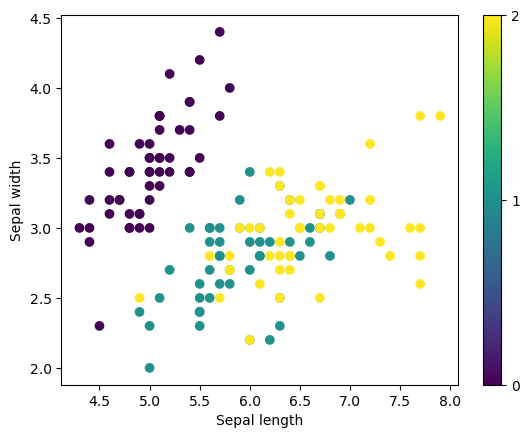

In [11]:
## Visualization of the data set
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar(ticks = [0,1,2])

In [16]:
# Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
X_train.shape, X_test.shape

((112, 2), (38, 2))

In [18]:
# Train a k-NN model with k = 3
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
#Check the accuracy of the model on test dataset
knn.score(X_test, y_test)

0.7894736842105263

In [21]:
# Return distances to and indices of the nearest  neighbors of the given data [[4.5, 4.5]]
knn.kneighbors([[4.5,4.5]])

(array([[0.80622577, 0.92195445, 0.92195445]]),
 array([[ 1, 20, 76]], dtype=int64))

In [22]:
knn_2=KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train, y_train)
knn_2.score(X_test, y_test)

0.8157894736842105